In [55]:
import ssms
from matplotlib import pyplot as plt
from ssms.basic_simulators import simulator
import numpy as np

In [56]:
help(ssms)

Help on package ssms:

NAME
    ssms - # import importlib.metadata

PACKAGE CONTENTS
    basic_simulators (package)
    config (package)
    dataset_generators (package)
    support_utils (package)

DATA
    __all__ = ['basic_simulators', 'dataset_generators', 'config', 'suppor...

VERSION
    0.6.0

FILE
    /Users/afengler/Library/CloudStorage/OneDrive-Personal/proj_ssm_simulators/ssm-simulators/ssms/__init__.py




In [3]:
ssms.config.model_config["ddm_mic2_ornstein"]

{'name': 'ddm_mic2_ornstein',
 'params': ['vh', 'vl1', 'vl2', 'a', 'zh', 'zl1', 'zl2', 'd', 'g', 't'],
 'param_bounds': [[-4.0, -4.0, -4.0, 0.3, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0],
  [4.0, 4.0, 4.0, 2.5, 0.8, 0.8, 0.8, 1.0, 3.0, 2.0]],
 'boundary': <function ssms.basic_simulators.boundary_functions.constant(t=0)>,
 'n_params': 10,
 'default_params': [0.0, 0.0, 0.0, 1.0, 0.5, 0.5, 0.5, 0.5, 1.5, 0.5],
 'hddm_include': ['vh', 'vl1', 'vl2', 'a', 'zh', 'zl1', 'zl2', 'd', 'g', 't'],
 'nchoices': 4}

In [5]:
x = ssms.basic_simulators.simulator.simulator(
    model="ddm_mic2_ornstein",
    theta={
        "vh": 1.0,
        "vl1": 2.0,
        "vl2": 2.0,
        "a": 1.5,
        "zh": 0.5,
        "zl1": 0.5,
        "zl2": 0.5,
        "d": 0.0,
        "g": 0.0,
        "t": 0.5,
    },
    n_samples=10000,
    delta_t=0.001,
    no_noise=False,
    smooth_unif=False,
)

In [6]:
x.keys()

dict_keys(['rts', 'choices', 'rts_high', 'rts_low', 'metadata'])

In [7]:
x["metadata"]

{'vh': array([1.], dtype=float32),
 'vl1': array([2.], dtype=float32),
 'vl2': array([2.], dtype=float32),
 'a': array([1.5], dtype=float32),
 'zh': array([0.5], dtype=float32),
 'zl1': array([0.5], dtype=float32),
 'zl2': array([0.5], dtype=float32),
 'd': array([0.], dtype=float32),
 't': array([0.5], dtype=float32),
 's': 1.0,
 'delta_t': 0.0010000000474974513,
 'max_t': 20.0,
 'n_samples': 10000,
 'simulator': 'ddm_flexbound_mic2_adj',
 'boundary_fun_type': 'constant',
 'possible_choices': [0, 1, 2, 3],
 'trajectory': 'This simulator does not yet allow for trajectory simulation',
 'boundary': array([1.5, 1.5, 1.5, ..., 1.5, 1.5, 1.5], dtype=float32),
 'model': 'ddm_mic2_ornstein'}

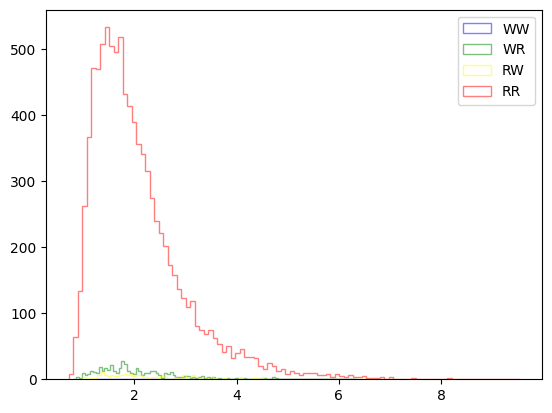

In [8]:
colors = {0: "blue", 1: "green", 2: "yellow", 3: "red", 4: "black"}
labels = {0: "WW", 1: "WR", 2: "RW", 3: "RR"}
for choice in x["metadata"]["possible_choices"]:
    plt.hist(
        x["rts"][x["choices"] == choice],
        alpha=0.5,
        label=labels[choice],
        color=colors[choice],
        histtype="step",
        bins=100,
    )
plt.legend()

In [54]:
ratio_list = []
mean_rt_list = []
for g_tmp in np.linspace(0, 10, 10):
    ratio_list.append([])
    mean_rt_list.append([])
    for v_low in np.linspace(0, 2, 10):
        x = ssms.basic_simulators.simulator.simulator(
            model="ddm_mic2_ornstein",
            theta={
                "vh": 1.0,
                "vl1": v_low,
                "vl2": v_low,
                "a": 1.5,
                "zh": 0.5,
                "zl1": 0.5,
                "zl2": 0.5,
                "d": 0.0,
                "g": g_tmp,
                "t": 0.5,
            },
            n_samples=10000,
            delta_t=0.001,
            no_noise=False,
            smooth_unif=False,
        )
        ratio_list[-1].append(
            np.sum(x["rts_low"] < x["rts_high"]) / x["rts_low"].shape[0]
        )
        mean_rt_list[-1].append(np.mean(x["rts"]))

ratio_list_precise = []
mean_rt_list_precise = []
for g_tmp in np.linspace(0, 10, 10):
    ratio_list_precise.append([])
    mean_rt_list_precise.append([])
    for v_low in np.linspace(0, 2, 10):
        x = ssms.basic_simulators.simulator.simulator(
            model="ddm_mic2_ornstein",
            theta={
                "vh": 1.0,
                "vl1": v_low,
                "vl2": v_low,
                "a": 1.5,
                "zh": 0.5,
                "zl1": 0.5,
                "zl2": 0.5,
                "d": 0.0,
                "g": g_tmp,
                "t": 0.5,
            },
            n_samples=10000,
            delta_t=0.0001,
            no_noise=False,
            smooth_unif=False,
        )
        ratio_list_precise[-1].append(
            np.sum(x["rts_low"] < x["rts_high"]) / x["rts_low"].shape[0]
        )
        mean_rt_list_precise[-1].append(np.mean(x["rts"]))

In [51]:
ratio_list

[[0.3444, 0.3381, 0.3596, 0.371, 0.3958, 0.438, 0.4545, 0.4992, 0.5304, 0.568],
 [0.1361,
  0.1362,
  0.1437,
  0.1575,
  0.1851,
  0.2134,
  0.2488,
  0.2824,
  0.3371,
  0.379],
 [0.0315,
  0.0303,
  0.0354,
  0.0397,
  0.0598,
  0.0705,
  0.0816,
  0.1036,
  0.1265,
  0.1603],
 [0.0036,
  0.0048,
  0.0039,
  0.007,
  0.0084,
  0.011,
  0.0191,
  0.0247,
  0.0304,
  0.0437],
 [0.0003,
  0.0008,
  0.0005,
  0.0008,
  0.0009,
  0.0018,
  0.003,
  0.0047,
  0.0039,
  0.0065],
 [0.0002, 0.0, 0.0, 0.0002, 0.0001, 0.0005, 0.0005, 0.0006, 0.0011, 0.0006],
 [0.0, 0.0001, 0.0, 0.0001, 0.0, 0.0, 0.0, 0.0, 0.0001, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

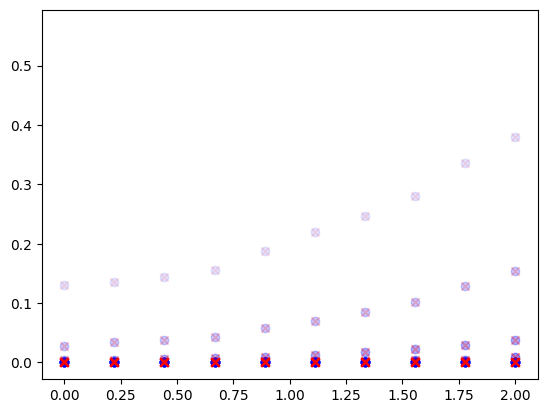

In [58]:
cnt = 0
for ratio_list_tmp in ratio_list:
    plt.scatter(
        np.linspace(0, 2, 10), ratio_list_tmp, alpha=cnt / len(ratio_list), color="blue"
    )
    cnt += 1

cnt = 0
for ratio_list_precise_tmp in ratio_list:
    plt.scatter(
        np.linspace(0, 2, 10),
        ratio_list_precise_tmp,
        alpha=cnt / len(ratio_list),
        color="red",
        marker="x",
    )
    cnt += 1

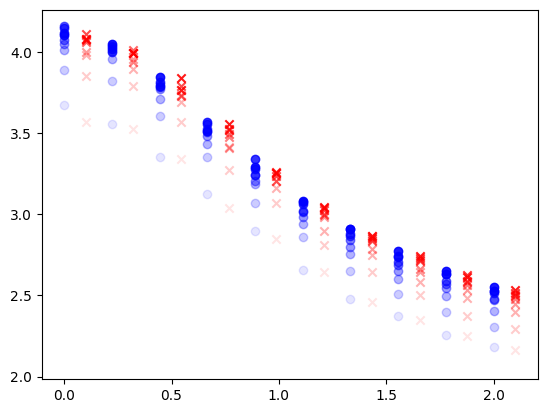

In [57]:
cnt = 0
for mean_rt_list_tmp in mean_rt_list:
    plt.scatter(
        np.linspace(0, 2, 10),
        mean_rt_list_tmp,
        alpha=cnt / len(ratio_list),
        color="blue",
    )
    cnt += 1

cnt = 0
for mean_rt_list_precise_tmp in mean_rt_list_precise:
    plt.scatter(
        np.linspace(0, 2, 10) + 0.1,
        mean_rt_list_precise_tmp,
        alpha=cnt / len(ratio_list),
        color="red",
        marker="x",
    )
    cnt += 1

In [10]:
np.linspace(0, 2, 10)

array([0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889,
       1.11111111, 1.33333333, 1.55555556, 1.77777778, 2.        ])

In [9]:
np.sum(x["rts_low"] < x["rts_high"])

5582

In [8]:
x.keys()

dict_keys(['rts', 'choices', 'rt_high', 'rts_low', 'metadata'])

In [93]:
mean_rt_list = []
for v_low in np.linspace(0, 0.1, 10):
    x = ssms.basic_simulators.simulator.simulator(
        model="ddm",
        theta={"v": v_low, "a": 1.0, "z": 0.5, "t": 0.5},
        n_samples=100000,
        delta_t=0.002,
        no_noise=False,
        smooth_unif=True,
    )
    mean_rt_list.append(np.mean(x["rts"]))

mean_rt_list_precise = []
for v_low in np.linspace(0, 0.1, 10):
    x_prec = ssms.basic_simulators.simulator.simulator(
        model="ddm",
        theta={"v": v_low, "a": 1.0, "z": 0.5, "t": 0.5},
        n_samples=100000,
        delta_t=0.001,
        no_noise=False,
        smooth_unif=True,
    )
    mean_rt_list_precise.append(np.mean(x_prec["rts"]))

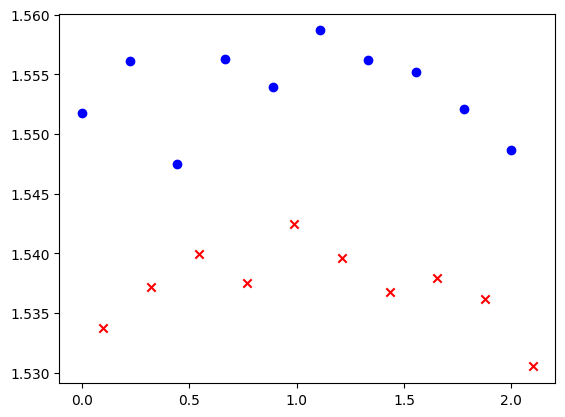

In [94]:
plt.scatter(np.linspace(0, 2, 10), mean_rt_list, color="blue")
plt.scatter(np.linspace(0, 2, 10) + 0.1, mean_rt_list_precise, color="red", marker="x")

(array([3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 5.000e+00,
        6.000e+00, 1.100e+01, 1.800e+01, 1.900e+01, 2.000e+01, 1.800e+01,
        3.300e+01, 4.300e+01, 5.600e+01, 6.800e+01, 8.700e+01, 1.110e+02,
        1.550e+02, 2.000e+02, 2.620e+02, 3.390e+02, 3.980e+02, 5.690e+02,
        7.050e+02, 8.510e+02, 1.167e+03, 1.463e+03, 1.910e+03, 2.438e+03,
        3.105e+03, 3.978e+03, 5.202e+03, 6.741e+03, 8.129e+03, 6.571e+03,
        3.030e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 9.420e+02,
        8.992e+03, 9.754e+03, 7.828e+03, 6.200e+03, 4.764e+03, 3.787e+03,
        2.853e+03, 2.301e+03, 1.703e+03, 1.310e+03, 1.048e+03, 7.590e+02,
        6.080e+02, 5.060e+02, 3.660e+02, 2.790e+02, 2.070e+02, 1.610e+02,
        1.380e+02, 1.180e+02, 9.000e+01, 8.200e+01, 4.700e+01, 4.100e+01,
        3.200e+01, 1.500e+01, 1.800e+01, 1.700e+01, 1.100e+01, 1.000e+01,
        6.000e+00, 1.000e+00, 4.000e+0

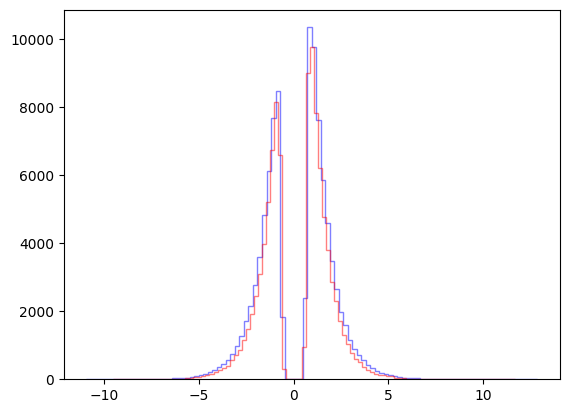

In [89]:
plt.hist(x["rts"] * x["choices"], bins=100, alpha=0.5, histtype="step", color="blue")
plt.hist(
    x_prec["rts"] * x_prec["choices"], bins=100, alpha=0.5, histtype="step", color="red"
)